In [4]:
import matplotlib
matplotlib.use('agg')
import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets
import time

PATCH_PATH = ('ipmlb') # image, prob, binary, largeborder


In [10]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:

t0=time.time()
X_train, y_train, X_test, y_test = gp.Patch.load_rgba(PATCH_PATH)

print 'Training patches', y_train.shape[0]
print 'Test patches', y_test.shape[0]

# X_train, y_train, X_test, y_test = gp.Patch.load_rgb(PATCH_PATH)
# X_train = X_train[:,:-1,:,:]
# X_test = X_test[:,:-1,:,:]

print time.time()-t0

Loaded /home/d/patches//ipmlb/ in 0.0708060264587 seconds.
Training patches 225520
Test patches 17560
183.70971489


In [7]:
t0 =time.time()
X_train = np.delete(X_train, [0,2] , axis=1) # delete image + binary
print time.time() - t0

3.19832801819


In [8]:
X_train.shape

(225520, 2, 75, 75)

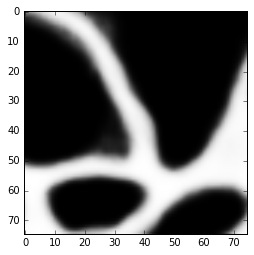

In [14]:
imshow(X_train[0][0], cmap='gray')

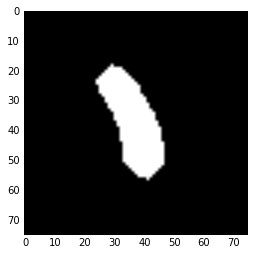

In [13]:
imshow(X_train[0][1], cmap='gray')

In [15]:
t0 =time.time()
X_test = np.delete(X_test, [0,2] , axis=1) # delete image + binary
print time.time() - t0

0.256724834442


In [16]:

cnn = nets.RGNetPlus()

cnn = cnn.fit(X_train, y_train)

test_accuracy = cnn.score(X_test, y_test)

print test_accuracy

# store CNN
sys.setrecursionlimit(1000000000)
with open(os.path.expanduser('~/Projects/gp/nets/PLB_FULL.p'), 'wb') as f:
  pickle.dump(cnn, f, -1)

CNN configuration: 
    Our CNN with image, prob, merged_array as RGB.

    This includes dropout. This also includes more layers.
    
# Neural Network with 170322 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     2x75x75
  1  conv1     64x73x73
  2  pool1     64x36x36
  3  dropout1  64x36x36
  4  conv2     48x34x34
  5  pool2     48x17x17
  6  dropout2  48x17x17
  7  conv3     48x15x15
  8  pool3     48x7x7
  9  dropout3  48x7x7
 10  conv4     48x5x5
 11  pool4     48x2x2
 12  dropout4  48x2x2
 13  hidden5   512
 14  dropout5  512
 15  output    2

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -------
      1     0.30147     0.29493    1.02218      0.88327  187.23s
      2     0.24007     0.24056    0.99795      0.90736  187.13s
      3     0.23588     0.24238    0.97319      0.90651  186.79s
      4     0.23405     0.23975    0.97624      0.90793  186.77s
    